## Modelo matemático
Un modelo matemático que describe la conducción de calor es el siguiente:

$\displaystyle
\nabla \cdot \left( \kappa \nabla T \right) = -q
$

donde $\kappa$ representa la conductividad térmica y $q$ una fuente de energía calorífica.

Si quisieramos determinar la distribución de temperaturas en una barra de metal, con $\kappa$ = cte., usaríamos un modelo en una dimensión que se puede escribir como sigue:

$
\displaystyle
\kappa \frac{d^2 T}{d x^2} = -q
$

La barra tiene una temperatura $T_A$ en su extremo izquierdo y otra temperatura $T_B$ en su extremo derecho y además consideramos que $q$ = cte.

En este caso particular, la solución se puede obtener de manera analítica, de tal manera que es posible encontrar una función $T(x)$ que proporcione la temperatura en cada posición $x$. También es posible aproximar la solución mediante técnicas numéricas. Veremos ambos casos a continuación, en los cuales se hace uso de las Series de Taylor.

## Solución analítica
Es posible obtener una función $T(x)$ que describa la distribución de temperaturas a lo largo de dicha barra. Para ello vamos a escribir $T(x)$ en forma de una serie Taylor

$
\displaystyle
T_n(x) = \sum_{i=0}^n T^{(i)}(a)\frac{(x-a)^i}{i!} = \sum_{i=0}^n c_i (x-a)^i
$

donde $\displaystyle c_i = \frac{T^{(i)}(a)}{i!}$.

Definimos ahora una aproximación alrededor de $a = 0$ para $n = 2$ con lo que obtenemos:


$\displaystyle
T(x) = c_0 + c_1 *x + c_2 * x^2
$

Calculamos la primera y segunda derivadas de $T(x)$:

$
\begin{eqnarray}
\frac{d T(x)}{d x} & = & c_1 + 2 * c_2 * x \\
\frac{d^2 T(x)}{d x^2} & = & 2 * c_2 \\
\end{eqnarray}
$

Sustituyendo esta segunda derivada en la ecuación de conducción de calor obtenemos:

$
\displaystyle
\kappa (2 * c_2 ) = -q \Longrightarrow \boxed{c_2 = -\frac{q}{2 \kappa}}
$

Para obtener $c_0$ y $c_1$ hacemos uso de las condiciones de frontera en $T(x)$:

$\displaystyle
\begin{eqnarray}
\text{Extremo izquierdo: } T(x=0) & = & c_0 + c_1 * 0 + c_2 * 0^2 = T_A  \\
&\Longrightarrow& \boxed{c_0 = T_A} \\
\text{Extremo derecho: } T(x=L) & = & c_0 + c_1 * L + c_2 * L^2 = T_A + c_1 * L - \frac{q}{2 \kappa} * L^2 =
T_B \\
&\Longrightarrow& \boxed{c_1 = \left(T_B - T_A + \frac{q L^2}{2 \kappa}\right)\frac{1}{L}}
\end{eqnarray}
$

De esta manera tenemos que la solución final es:

$\displaystyle
T(x) = T_A + \left(T_B - T_A + \frac{q L^2}{2 \kappa}\right)\frac{1}{L} x - \frac{q}{2 \kappa} x^2 =
\boxed{\left(\frac{T_B - T_A}{L} + \frac{q}{2\kappa} \left(L - x\right) \right)x + T_A}
$

Implementamos esta solución en una función de Python:

<div class="alert alert-success">

## **Ejercicio 1.**
Evaluar $T(x) = \left(\frac{T_B - T_A}{L} + \frac{q}{2\kappa} \left(L - x\right) \right)x + T_A$ usando los siguientes datos:

- $\kappa = 1000$ [W /m $^o$C]
- $L = 0.5$ [m]
- $T_A = 100$ [$^o$C]
- $T_B = 500$ [$^o$C]
- $q = 0$

</div>

In [1]:
# Datos del problema
k = 1000 
L = 0.5  
TA = 100
TB = 500 
q = 0

Impresión de los datos:

In [3]:
print(k, L, TA, TB, q)

1000 0.5 100 500 0


Impresión del tipo de dato:

In [5]:
print(type(L))

<class 'float'>


Evaluación de la fórmula para un valor de $x$:

In [6]:
x = 0.0
T0 = ((TB - TA)/L + q /(2*k) * (L - x) ) * x + TA
print(T0)

100.0


Evaluación para varios valores de $x$:

In [8]:
# Definimos una lista
xl = [0.0, 0.25 * L, 0.75 * L, L]
print(xl)

[0.0, 0.125, 0.375, 0.5]


In [9]:
# Intentamos evaluar la fórmula usando la lista:
((TB - TA)/L + q /(2*k) * (L - xl) ) * xl + TA

TypeError: unsupported operand type(s) for -: 'float' and 'list'

In [10]:
# Para cada elemento de la lista evaluamos la fórmula
for x in xl:
    print( ((TB - TA)/L + q /(2*k) * (L - x) ) * x + TA )


100.0
200.0
400.0
500.0


Listas comprimidas (*list comprehensions*)

In [11]:
[i for i in range(0,11) ]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [12]:
[L * i / 10 for i in range(0,11)]

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

In [13]:
N = 10
[L * i / N for i in range(0,N+1)]

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

In [15]:
N = 21
xlc = [L * i / N for i in range(0,N+1)]

In [16]:
print(xlc)

[0.0, 0.023809523809523808, 0.047619047619047616, 0.07142857142857142, 0.09523809523809523, 0.11904761904761904, 0.14285714285714285, 0.16666666666666666, 0.19047619047619047, 0.21428571428571427, 0.23809523809523808, 0.2619047619047619, 0.2857142857142857, 0.30952380952380953, 0.3333333333333333, 0.35714285714285715, 0.38095238095238093, 0.40476190476190477, 0.42857142857142855, 0.4523809523809524, 0.47619047619047616, 0.5]


In [17]:
for x in xlc:
    print( ((TB - TA)/L + q /(2*k) * (L - x) ) * x + TA )

100.0
119.04761904761905
138.0952380952381
157.14285714285714
176.1904761904762
195.23809523809524
214.28571428571428
233.33333333333331
252.38095238095238
271.42857142857144
290.4761904761905
309.5238095238095
328.57142857142856
347.6190476190476
366.66666666666663
385.7142857142857
404.76190476190476
423.8095238095238
442.85714285714283
461.9047619047619
480.9523809523809
500.0


Almacenamiento de los valores de $T(x)$ en una lista

In [18]:
# Creamos una lista vacía
T = []

In [20]:
print(type(T))

<class 'list'>


In [ ]:
T.

In [21]:
# Calculamos la fórmula
for x in xlc:
    T.append( ((TB - TA)/L + q /(2*k) * (L - x) ) * x + TA )

In [22]:
print(T)

[100.0, 119.04761904761905, 138.0952380952381, 157.14285714285714, 176.1904761904762, 195.23809523809524, 214.28571428571428, 233.33333333333331, 252.38095238095238, 271.42857142857144, 290.4761904761905, 309.5238095238095, 328.57142857142856, 347.6190476190476, 366.66666666666663, 385.7142857142857, 404.76190476190476, 423.8095238095238, 442.85714285714283, 461.9047619047619, 480.9523809523809, 500.0]


<div class="alert alert-success">

## **Ejercicio 2.**
Crear una función de Python para evaluar $T(x) = \left(\frac{T_B - T_A}{L} + \frac{q}{2\kappa} \left(L - x\right) \right)x + T_A$.

</div>

In [23]:
def temperatura(x, TA, TB, L, k, q):
    """
    Calcula la temperatura usando la fórmula obtenida con Series de Taylor.
    """
    return ((TB - TA)/L + q /(2*k) * (L - x) ) * x + TA

In [24]:
# Datos físicos
k = 1000
L = 0.5
TA = 100
TB = 500
q = 0

# Datos numéricos
N = 21
xlc = [L * i / N for i in range(0,N+1)]

In [26]:
# Calculamos la fórmula
for x in xlc:
    print(temperatura(x, TA, TB, L, k, q))

100.0
119.04761904761905
138.0952380952381
157.14285714285714
176.1904761904762
195.23809523809524
214.28571428571428
233.33333333333331
252.38095238095238
271.42857142857144
290.4761904761905
309.5238095238095
328.57142857142856
347.6190476190476
366.66666666666663
385.7142857142857
404.76190476190476
423.8095238095238
442.85714285714283
461.9047619047619
480.9523809523809
500.0


* Imprimir los resultados al vuelo
* Almacenar los valores de $T$ en una lista y luego imprimirlos.

In [29]:
T = []
for x in xlc:
    T.append(temperatura(x, TA, TB, L, k, q))
    print(T)

[100.0]
[100.0, 119.04761904761905]
[100.0, 119.04761904761905, 138.0952380952381]
[100.0, 119.04761904761905, 138.0952380952381, 157.14285714285714]
[100.0, 119.04761904761905, 138.0952380952381, 157.14285714285714, 176.1904761904762]
[100.0, 119.04761904761905, 138.0952380952381, 157.14285714285714, 176.1904761904762, 195.23809523809524]
[100.0, 119.04761904761905, 138.0952380952381, 157.14285714285714, 176.1904761904762, 195.23809523809524, 214.28571428571428]
[100.0, 119.04761904761905, 138.0952380952381, 157.14285714285714, 176.1904761904762, 195.23809523809524, 214.28571428571428, 233.33333333333331]
[100.0, 119.04761904761905, 138.0952380952381, 157.14285714285714, 176.1904761904762, 195.23809523809524, 214.28571428571428, 233.33333333333331, 252.38095238095238]
[100.0, 119.04761904761905, 138.0952380952381, 157.14285714285714, 176.1904761904762, 195.23809523809524, 214.28571428571428, 233.33333333333331, 252.38095238095238, 271.42857142857144]
[100.0, 119.04761904761905, 138.09

In [28]:
print(T)

[100.0, 119.04761904761905, 138.0952380952381, 157.14285714285714, 176.1904761904762, 195.23809523809524, 214.28571428571428, 233.33333333333331, 252.38095238095238, 271.42857142857144, 290.4761904761905, 309.5238095238095, 328.57142857142856, 347.6190476190476, 366.66666666666663, 385.7142857142857, 404.76190476190476, 423.8095238095238, 442.85714285714283, 461.9047619047619, 480.9523809523809, 500.0]


<div class="alert alert-success">

## **Ejercicio 3.**
Evaluar la función `temperatura()` usando la biblioteca `numpy`.

</div>

In [30]:
import numpy as np

In [31]:
x = np.linspace(0,L,N)
x

array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  ])

In [32]:
type(x)

numpy.ndarray

In [ ]:
x.

Algunos atributos del arreglo:

In [33]:
print(type(x))    # tipo de x
print(x.dtype)    # tipo de cada elemento de x
print(x.ndim)     # dimensión del arreglo
print(x.shape)    # forma del arreglo
print(x.itemsize) # tamaño de cada elemento de x
print(x.size)     # total de elementos de x

<class 'numpy.ndarray'>
float64
1
(21,)
8
21


In [34]:
info_array = lambda x: print(f' tipo  : {type(x)} \n dtype : {x.dtype} \n dim   : {x.ndim} \n shape : {x.shape} \n size(bytes) : {x.itemsize} \n size(elements) : {x.size}')

In [35]:
info_array(x)

 tipo  : <class 'numpy.ndarray'> 
 dtype : float64 
 dim   : 1 
 shape : (21,) 
 size(bytes) : 8 
 size(elements) : 21


¿Podremos evaluar la función `temperatura()` usando el arreglo `x`?

In [36]:
temperatura(x, TA, TB, L, k, q)

array([100., 120., 140., 160., 180., 200., 220., 240., 260., 280., 300.,
       320., 340., 360., 380., 400., 420., 440., 460., 480., 500.])

In [37]:
T = temperatura(x, TA, TB, L, k, q)

In [38]:
T

array([100., 120., 140., 160., 180., 200., 220., 240., 260., 280., 300.,
       320., 340., 360., 380., 400., 420., 440., 460., 480., 500.])

<div class="alert alert-success">

## **Ejercicio 4.**
Graficar la temperatura usando la biblioteca `matplotlib`.

</div>

In [44]:
import matplotlib.pyplot as plt

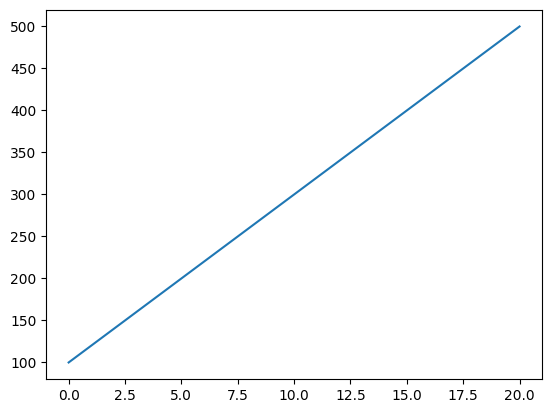

In [45]:
plt.plot(T)

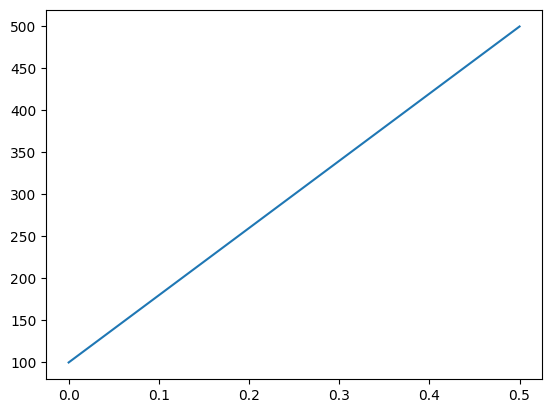

In [41]:
plt.plot(x, T)

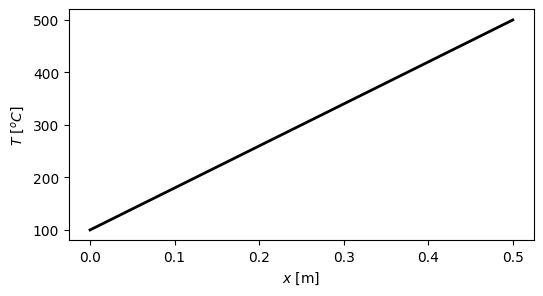

In [46]:
# Personalización de la gráfica
plt.figure(figsize=(6,3))
plt.xlabel('$x$ [m]')
plt.ylabel('$T$ [$^oC$]')

# Graficación de la Temperatura
plt.plot(x,T,color='k', lw = 2.0)

plt.show()

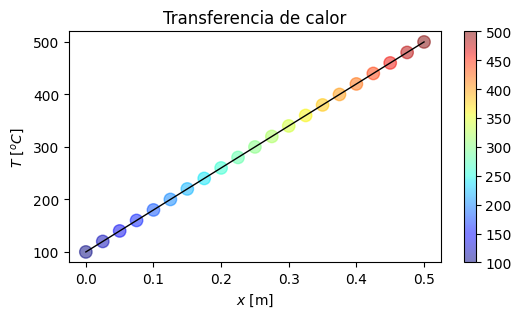

In [48]:
# Personalización de la gráfica
plt.figure(figsize=(6,3))
plt.title('Transferencia de calor')
plt.xlabel('$x$ [m]')
plt.ylabel('$T$ [$^oC$]')

# Realizamos la gráfica con una línea 
plt.plot(x, T, color='k', lw =1.0)

# Graficamos puntos con un color dependiendo de su temperatura
s = plt.scatter(x, T, c=T, cmap='jet', s=80, alpha=0.5)

# Se muestra una barra de color 
plt.colorbar(s) 

plt.savefig('temperatura.pdf')
plt.show()

<div class="alert alert-success">

## **Ejercicio 5.**
Modificar la función `temperatura()` para que tenga valores por omisión en los argumentos $k$ y $q$. Luego hacer pruebas llamando a la función con diferentes valores de estos argumentos.
</div>

In [49]:
def temperatura(x, TA, TB, L, k=1000.0, q=0.0):
    """
    Calcula la temperatura usando la fórmula obtenida con Series de Taylor.
    """
    return ((TB - TA)/L + q /(2*k) * (L - x) ) * x + TA

In [50]:
# Datos del problema
k = 1000
L = 0.5
TA = 100
TB = 500
q = 0

# Datos numéricos
N = 21
x = np.linspace(0,L,N)

In [51]:
# Se usan los argumentos por omisión
temperatura(x, TA, TB, L)

array([100., 120., 140., 160., 180., 200., 220., 240., 260., 280., 300.,
       320., 340., 360., 380., 400., 420., 440., 460., 480., 500.])

In [52]:
# Se cambia uno de los argumentos por omisión (keyword args)
temperatura(x, TA, TB, L, k=1.0)

array([100., 120., 140., 160., 180., 200., 220., 240., 260., 280., 300.,
       320., 340., 360., 380., 400., 420., 440., 460., 480., 500.])

In [53]:
# Se cambia uno de los argumentos por omisión (keyword args)
temperatura(x, TA, TB, L, q=5.0)

array([100.        , 120.00002969, 140.00005625, 160.00007969,
       180.0001    , 200.00011719, 220.00013125, 240.00014219,
       260.00015   , 280.00015469, 300.00015625, 320.00015469,
       340.00015   , 360.00014219, 380.00013125, 400.00011719,
       420.0001    , 440.00007969, 460.00005625, 480.00002969,
       500.        ])

In [54]:
# Se cambian los dos argumentos por omisión (keyword args)
temperatura(x, TA, TB, L, k=1.0, q=5.0)

array([100.       , 120.0296875, 140.05625  , 160.0796875, 180.1      ,
       200.1171875, 220.13125  , 240.1421875, 260.15     , 280.1546875,
       300.15625  , 320.1546875, 340.15     , 360.1421875, 380.13125  ,
       400.1171875, 420.1      , 440.0796875, 460.05625  , 480.0296875,
       500.       ])

In [55]:
# Se cambian los dos argumentos por omisión (positional args)
temperatura(x, TA, TB, L, 1.0, 5.0)

array([100.       , 120.0296875, 140.05625  , 160.0796875, 180.1      ,
       200.1171875, 220.13125  , 240.1421875, 260.15     , 280.1546875,
       300.15625  , 320.1546875, 340.15     , 360.1421875, 380.13125  ,
       400.1171875, 420.1      , 440.0796875, 460.05625  , 480.0296875,
       500.       ])

In [56]:
temperatura(x, TA, TB, L, q=5.0, k=1.0)

array([100.       , 120.0296875, 140.05625  , 160.0796875, 180.1      ,
       200.1171875, 220.13125  , 240.1421875, 260.15     , 280.1546875,
       300.15625  , 320.1546875, 340.15     , 360.1421875, 380.13125  ,
       400.1171875, 420.1      , 440.0796875, 460.05625  , 480.0296875,
       500.       ])

<div class="alert alert-success">

## **Ejercicio 6.**
Graficar $T(x)$ para diferentes valores de $q$ usando la última versión de la función `temperatura()`.

</div>

In [57]:
for q in [i*1e3 for i in range(-5,6)]:
    print('q = ', q)
    print(temperatura(x, TA, TB, L, k=1.0, q=q))

q =  -5000.0
[100.      90.3125  83.75    80.3125  80.      82.8125  88.75    97.8125
 110.     125.3125 143.75   165.3125 190.     217.8125 248.75   282.8125
 320.     360.3125 403.75   450.3125 500.    ]
q =  -4000.0
[100.    96.25  95.    96.25 100.   106.25 115.   126.25 140.   156.25
 175.   196.25 220.   246.25 275.   306.25 340.   376.25 415.   456.25
 500.  ]
q =  -3000.0
[100.     102.1875 106.25   112.1875 120.     129.6875 141.25   154.6875
 170.     187.1875 206.25   227.1875 250.     274.6875 301.25   329.6875
 360.     392.1875 426.25   462.1875 500.    ]
q =  -2000.0
[100.    108.125 117.5   128.125 140.    153.125 167.5   183.125 200.
 218.125 237.5   258.125 280.    303.125 327.5   353.125 380.    408.125
 437.5   468.125 500.   ]
q =  -1000.0
[100.     114.0625 128.75   144.0625 160.     176.5625 193.75   211.5625
 230.     249.0625 268.75   289.0625 310.     331.5625 353.75   376.5625
 400.     424.0625 448.75   474.0625 500.    ]
q =  0.0
[100. 120. 140. 160. 180. 2

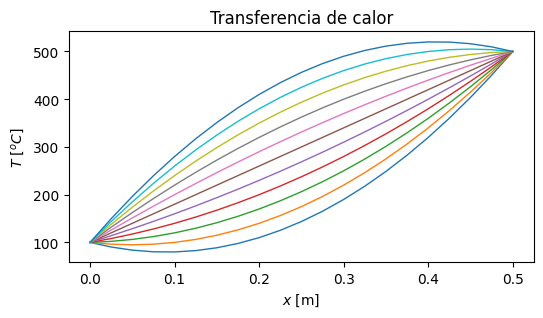

In [58]:
# Personalización de la gráfica
plt.figure(figsize=(6,3))
plt.title('Transferencia de calor')
plt.xlabel('$x$ [m]')
plt.ylabel('$T$ [$^oC$]')

for q in [i*1e3 for i in range(-5,6)]:
    # Realizamos la gráfica con una línea 
    plt.plot(x, temperatura(x, TA, TB, L, k=1.0, q=q), lw =1.0)

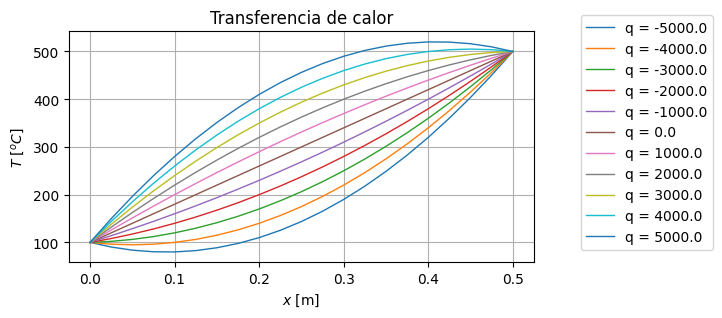

In [67]:
# Personalización de la gráfica
plt.figure(figsize=(6,3))
plt.title('Transferencia de calor')
plt.xlabel('$x$ [m]')
plt.ylabel('$T$ [$^oC$]')

for q in [i*1e3 for i in range(-5,6)]:
    # Realizamos la gráfica con una línea 
    plt.plot(x, temperatura(x, TA, TB, L, k=1.0, q=q), 
             lw =1.0, label='q = {}'.format(q))

plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.1))
plt.grid()

<div class="alert alert-success">

## **Ejercicio 7.**
Graficar $T(x)$ para diferentes valores de $k$ y $q=1.0$ usando la última versión de la función `temperatura()`.

</div>

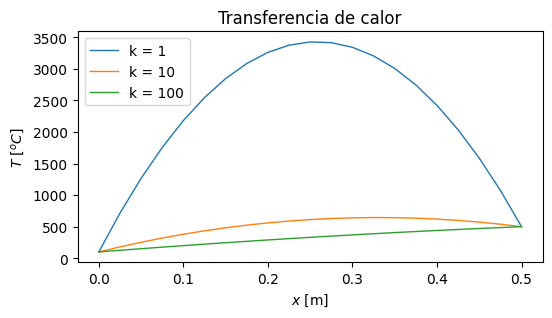

In [68]:
# Personalización de la gráfica
plt.figure(figsize=(6,3))
plt.title('Transferencia de calor')
plt.xlabel('$x$ [m]')
plt.ylabel('$T$ [$^oC$]')

for k in [1, 10, 100]:
    # Realizamos la gráfica con una línea 
    plt.plot(x, temperatura(x, TA, TB, L, k=k, q=1e5),
            lw =1.0, label='k = {}'.format(k))

plt.legend()


## Solución numérica
Los ejemplos anteriores también se pueden resolver usando el método numérico conocido como diferencias finitas, el cual se obtiene también usando Series de Taylor. Veamos como:

### Derivadas de primer orden
Supongamos que $u(x)$ es una función bien comportada con $n$ derivadas continuas.
Entonces podemos escribir la siguiente serie de Taylor alrededor de $x_0$:

$$
u(x_0+h) = u(x_0) + u^\prime(x_0)h + \dfrac{u^{\prime\prime}(x_0)}{2!}h^2 + \dots + \dfrac{u^{(n)}(x_0)}{n!}h^n + R_n(x)
$$ 

donde $h = x-x_0$ y de aquí se tiene que $x = x_0 + h$. Si truncamos el polinomio de Taylor a primer orden tenemos:

$$
u(x_0+h) = u(x_0) + u^\prime(x_0)h + R_1(x)
$$

Luego despejamos $u^\prime(x_0)$:

$\displaystyle
\begin{eqnarray}
\Longrightarrow u^\prime(x_0) & = & \frac{u(x_0+h) - u(x_0)}{h} - \frac{R_1(x)}{h} \\
\Longrightarrow u^\prime(x_0) & = & \frac{u(x_0+h) - u(x_0)}{h} - \frac{u^{\prime\prime}(\xi) h^2 / 2!}{h} \\ 
\Longrightarrow u^\prime(x_0) & = & \frac{u(x_0+h) - u(x_0)}{h} - \frac{u^{\prime\prime}(\xi)}{2} h\\
\Longrightarrow u^\prime(x_0) & = & \frac{u(x_0+h) - u(x_0)}{h} - \mathcal{O}(h) \tag{1}\\
\end{eqnarray}
$

**Observaciones**:
1. La expresión $\mathcal{O}(h)$ en la ecuación $(1)$ significa que el último término es de orden $h$.

2. Cuando $h$ es muy pequeña podemos escribir la ecuación $(1)$ como sigue:

$$
u^\prime(x_0) = \lim_{h \rightarrow 0 } \dfrac{u(x_0+h) - u(x_0)}{h}
$$

Esta es la definición para la derivada que se ve en los libros de cálculo.

3. Si eliminamos el término $\mathcal{O}(h)$ de la ecuación $(1)$ tendremos una aproximación de la derivada, cuyo orden de aproximación es $h$:

$$
u^\prime(x_0) \approx \dfrac{u(x_0+h) - u(x_0)}{h} \tag{1}
$$

A esta aproximación se le conoce como **Diferencias Finitas hacia Adelante**.

<div class="alert alert-success">

## **Ejercicio 8.**
¿Cómo se escribe la aproximación de la derivada hacia atrás de orden $h$?

**Hint**: Escriba la expansión en series de Taylor de $u(x_0-h)$ y despeje $u^\prime(x_0)$

</div>

### Derivadas de segundo orden

Las expansiones en series de Taylor de $u(x_0 + h)$ y de $u(x_0 - h)$ son: 

$\displaystyle
u(x_0+h) = u(x_0) + u^\prime(x_0)h + \frac{u^{\prime\prime}(x_0)}{2!}h^2 + \frac{u^{\prime\prime\prime}(x_0)}{3!}h^3 + \dots + \frac{u^{(n)}(x_0)}{n!}h^n + R_n(x)
$ 

$\displaystyle
u(x_0-h) = u(x_0) - u^\prime(x_0)h + \frac{u^{\prime\prime}(x_0)}{2!}h^2 - \frac{u^{\prime\prime\prime}(x_0)}{3!}h^3 + \dots + \frac{u^{(n)}(x_0)}{n!}h^n + R_n(x)
$ 

Ahora sumamos a las dos ecuaciones para obtener:

$\displaystyle
u(x_0+h) + u(x_0-h) = 2u(x_0) + u^{\prime\prime}(x_0) h^2 + \frac{2 u^{(4)}(x_0)}{4!}h^4 + 
\frac{2 u^{(6)}(x_0)}{6!}h^6 + \dots + \mathcal{O}(h^{(n+1)})$ 

Observamos que todos los términos de orden impar se han eliminado, esto debido a que esta aproximación es simétrica y está centrada en $x_0$. Truncamos la serie hasta orden 4 y despejamos $u^{\prime\prime}(x_0)$ :

$\displaystyle
u^{\prime\prime}(x_0) = \frac{u(x_0-h) - 2u(x_0) +  u(x_0+h)}{h^2} + \mathcal{O}(h^2) \tag{2}$ 

Tenemos entonces una aproximación a la segunda derivada de orden $h^2$.

### Aproximación de la ecuación de calor
Usando la aproximación de la segunda derivada, ecuación $(2)$, se puede escribir la  ecuación de calor
$
\displaystyle
\kappa \frac{d^2 T}{d x^2} = q
$
como sigue:

$$
\displaystyle
\begin{eqnarray}
\kappa \left( \frac{T(x_0-h) - 2T(x_0) +  T(x_0+h)}{h^2} \right) & = & q \\
\Longrightarrow T(x_0-h) - 2T(x_0) +  T(x_0+h) & = & \frac{q h^2}{\kappa}
\end{eqnarray}
$$

Lo que nos dice esta última ecuación es que se puede aproximar la temperatura en $x_0$ con un error de orden $\mathcal{O}(h^2)$. Entonces entre más pequeño sea el $h$ mejor es la aproximación. Para obtener una solución en toda la barra, se construye una ecuación como la anterior para cada punto de la barra donde se desea conocer la temperatura.

Los puntos estarán equidistantes de tal manera que la distancia entre ellos, $h$, se puede disminuir agregando cada vez más puntos. Obsérvese también que hay dos puntos especiales en  los extremos de la barra, donde la temperatura es conocida (condiciones de frontera).
Si escribimos las ecuaciones para todos los puntos, digamos que tenemos $N$ puntos, entonces obtendremos un sistema lineal de ecuaciones como el siguiente:

$
\begin{eqnarray}
T_0 - 2T_1 + T_2  & = & -Q \\
T_1 - 2T_2 + T_3 & = & -Q \\
& \vdots & \\
T_{N-2} - 2T_{N-1} + T_N & = & -Q 
\end{eqnarray}
$

donde $\displaystyle Q = \frac{q h^2}{\kappa}$, $T_0 = T_A$ (temperatura en el extremo izquierdo) y $T_N = T_B$ (temperatura en el extremo derecho). 

Se puede escribir este sistemal en forma matricial :

$
\left(
\begin{array}{ccccccccc}
-2 & 1 & 0 & \dots & & & 0\\ 
 1 &-2 & 1 & 0 & \dots & &0\\ 
 0 & 1 &-2 & 1 & 0 &  & 0\\ 
 \vdots &\ddots&\ddots&\ddots&\ddots&\ddots&\vdots\\
0 & \dots & 0 & 1 &-2 & 1 & 0 \\
0 &  \dots && 0 & 1 &-2 & 1 \\
0 &  \dots &&& 0 & 1 &-2  \\
\end{array}\right)
\left(
\begin{array}{c}
T_1 \\ T_2 \\ T_3 \\ \vdots \\ T_{N-3} \\ T_{N-2} \\ T_{N-1}
\end{array}\right) = 
-\left(
\begin{array}{c}
Q + T_A \\ Q \\ Q \\ \vdots \\ Q \\ Q \\ Q + T_{B}
\end{array}\right)
$

Resolviendo el sistema obtendremos las temperaturas en todos los puntos y por lo tanto una aproximación a la solución. La siguiente función de Python genera el sistema lineal, lo resuelve y regresa la temperatura en los diferentes puntos de la barra:

In [69]:
# Datos del problema
k = 1000
L = 0.5
TA = 100
TB = 500
q = 0

# Datos numéricos
N = 21

In [71]:
M = np.array([[1,2,3.], 
              [4,5,6], 
              [7,8,9]])
info_array(M)

 tipo  : <class 'numpy.ndarray'> 
 dtype : float64 
 dim   : 2 
 shape : (3, 3) 
 size(bytes) : 8 
 size(elements) : 9


### Construcción de la matriz y el RHS

In [72]:
def buildMat(N):
    A = np.zeros((N, N))

    # Primer renglón
    A[0,0] = -2
    A[0,1] = 1

    # Renglones internos
    for i in range(1,N-1):
        A[i,i-1] = 1
        A[i,i]   = -2
        A[i,i+1] = 1

    # Último renglón
    A[-1,-2] = 1
    A[-1,-1] = -2
    return A

def buildRHS(N, q, h, k, TA, TB):
    Q = np.zeros(N)
    for i in range(0,N):
        Q[i] = -q * h**2 / k

    Q[0]  -= TA
    Q[-1] -= TB
    return Q

In [73]:
print(buildMat(5))
print(buildRHS(5,q,L/(N-1),k,TA,TB))

[[-2.  1.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 0.  0.  0.  1. -2.]]
[-100.    0.    0.    0. -500.]


### Construcción de la matriz y el RHS (vectorizada)

Construcción de la matriz con la función `np.eye()`

In [78]:
np.eye(5, k=-1)

array([[0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [79]:
-2 * np.eye(5) + np.eye(5, k=1) + np.eye(5,k=-1)

array([[-2.,  1.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  1., -2.]])

In [80]:
def buildMat_V(N):
    return -2 * np.eye(N) + np.eye(N,k=1) + np.eye(N,k=-1)

def buildRHS_V(N, q, h, k, TA, TB):
    Q = np.ones(N) * (-q * h**2 / k)
    Q[0]  -= TA
    Q[-1] -= TB
    return Q

In [81]:
print(buildMat_V(5))
print(buildRHS_V(5,q,L/(N-1),k,TA,TB))

[[-2.  1.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 0.  0.  0.  1. -2.]]
[-100.    0.    0.    0. -500.]


### Comparación en tiempo

In [83]:
import time

N = 100000
h = L / (N-1)

tic = time.perf_counter()
buildRHS(N,q,h,k,TA,TB)
toc = time.perf_counter()
print('CPU time   : {:10.9f} [s]'.format(toc - tic))

tic = time.perf_counter()
buildRHS_V(N,q,h,k,TA,TB)
toc = time.perf_counter()
print('CPU time(V): {:10.9f} [s]'.format(toc - tic))

CPU time   : 0.082922343 [s]
CPU time(V): 0.000897266 [s]


### Cálculo de la solución numérica

In [85]:
N = 5
h = L / (N-1)

# Arreglo para almacenar la solución numérica
T = np.zeros(N)

# Condiciones de frontera
T[0] = TA
T[-1] = TB

A = buildMat_V(N-2)
Q = buildRHS_V(N-2, q ,h , k, TA, TB)
T[1:-1] = np.linalg.solve(A, Q)

print(T)

[100. 200. 300. 400. 500.]


<div class="alert alert-success">

## **Ejercicio 9.**
Repetir el ejercicio 6 pero ahora calculando la solución numérica (vectorizada).

</div>

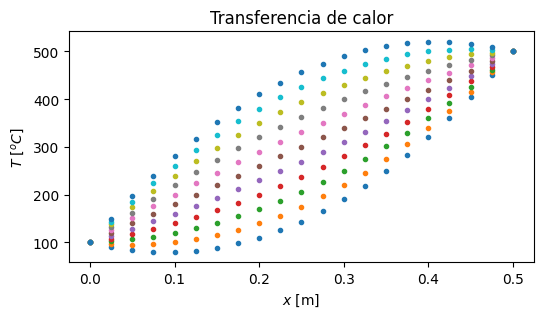

In [91]:
N = 21
h = L / (N-1)
k = 1.0

# Arreglo para almacenar la solución numérica
T = np.zeros(N)

# Condiciones de frontera
T[0] = TA
T[-1] = TB

A = buildMat_V(N-2)

# Personalización de la gráfica
plt.figure(figsize=(6,3))
plt.title('Transferencia de calor')
plt.xlabel('$x$ [m]')
plt.ylabel('$T$ [$^oC$]')

for q in [i*1e3 for i in range(-5,6)]:
    Q = buildRHS_V(N-2, q, h, k, TA, TB)
    T[1:-1] = np.linalg.solve(A, Q)
    # Realizamos la gráfica con una línea 
    plt.plot(x, T, '.', lw =1.0)


<div class="alert alert-success">

## **Ejercicio 10.**
Compara la solución numérica con la exacta para los casos calculados en el ejercicio 9.
    
</div>

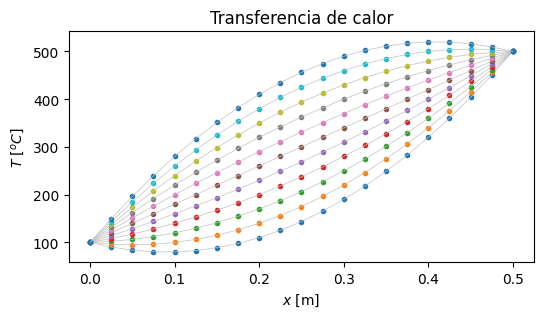

In [92]:
# Personalización de la gráfica
plt.figure(figsize=(6,3))
plt.title('Transferencia de calor')
plt.xlabel('$x$ [m]')
plt.ylabel('$T$ [$^oC$]')

for q in [i*1e3 for i in range(-5,6)]:
    Q = buildRHS_V(N-2, q, h, k, TA, TB)
    T[1:-1] = np.linalg.solve(A, Q)
    # Realizamos la gráfica con una línea 
    plt.plot(x, T, '.', lw =1.0)
    plt.plot(x, temperatura(x, TA, TB, L, k=1.0, q=q), c='silver',
             lw =0.5, label='q = {}'.format(q)) 

In [94]:
help(np)

Help on package numpy:

NAME
    numpy

DESCRIPTION
    NumPy
    =====
    
    Provides
      1. An array object of arbitrary homogeneous items
      2. Fast mathematical operations over arrays
      3. Linear Algebra, Fourier Transforms, Random Number Generation
    
    How to use the documentation
    ----------------------------
    Documentation is available in two forms: docstrings provided
    with the code, and a loose standing reference guide, available from
    `the NumPy homepage <https://numpy.org>`_.
    
    We recommend exploring the docstrings using
    `IPython <https://ipython.org>`_, an advanced Python shell with
    TAB-completion and introspection capabilities.  See below for further
    instructions.
    
    The docstring examples assume that `numpy` has been imported as ``np``::
    
      >>> import numpy as np
    
    Code snippets are indicated by three greater-than signs::
    
      >>> x = 42
      >>> x = x + 1
    
    Use the built-in ``help`` functi

In [95]:

help(np.linspace)

Help on _ArrayFunctionDispatcher in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior can
        still be obtained with ``np.linspace(start, stop, num).astype(int)``
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, s

In [96]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
